In [1]:
import os
os.chdir('/home/user/src')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In total 162555 for train


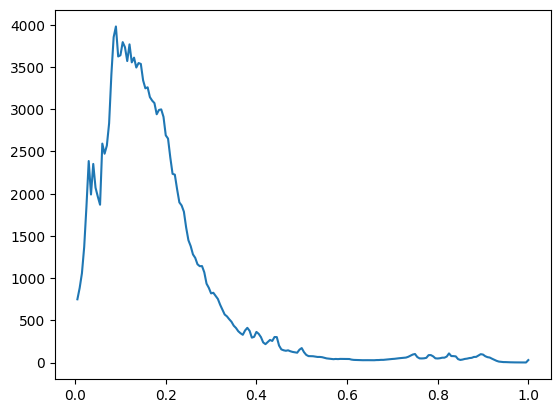

In [3]:
from omegaconf import OmegaConf
import hydra
cfg = OmegaConf.load('/home/user/src/configs/s2_mae_channel.yaml')
dlc = hydra.utils.instantiate(cfg.dataloader)
dl = dlc(cfg,"train")

H = np.zeros(200)
bins=np.linspace(0,1,201)

N = 100
for i in range(N):

    batch = dl.__getitem__(i)
    s2=batch["s2"].flatten()
    H += np.histogram(s2,bins=bins)[0]
    
H /= N

plt.plot(bins[1:],H)
plt.show()

In total 162555 for train


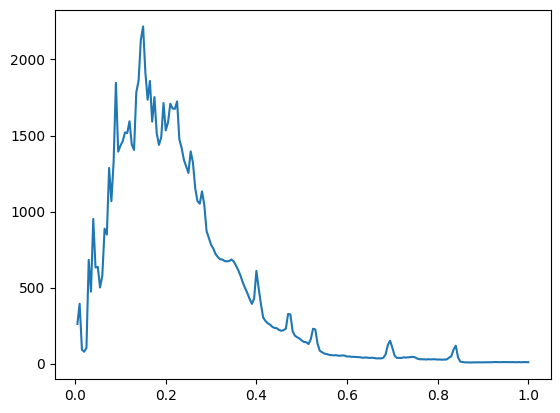

tensor(5.3352)


In [12]:
from omegaconf import OmegaConf
import hydra
cfg = OmegaConf.load('/home/user/src/configs/s2_mae_channel_responseAware.yaml')
dlc = hydra.utils.instantiate(cfg.dataloader)
dl = dlc(cfg,"train")

H = np.zeros(200)
bins=np.linspace(0,1,201)

M=0
N = 50
for i in range(N):

    batch = dl.__getitem__(i)
    s2=batch["s2"].flatten()
    H += np.histogram(s2,bins=bins)[0]

    if s2.max() > M:
        M=s2.max()
        

H /= N

plt.plot(bins[1:],H)
plt.show()
print(M)

+++++++++++++++++


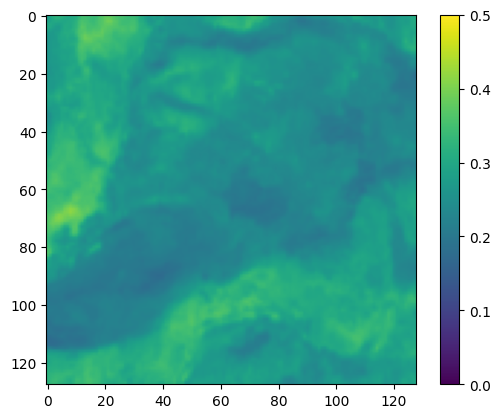

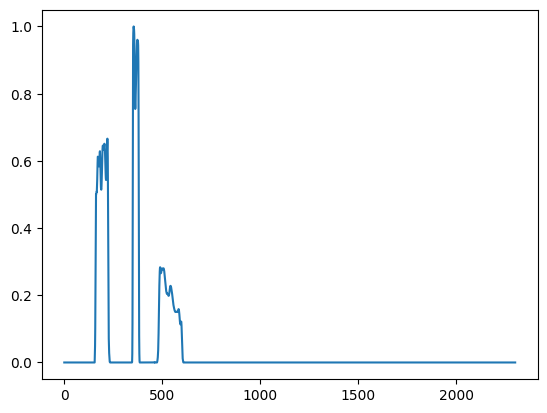

tensor(10.)
+++++++++++++++++


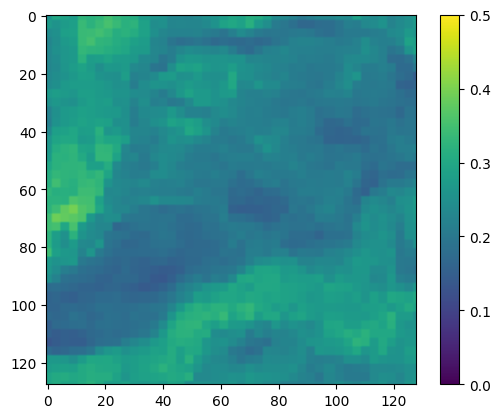

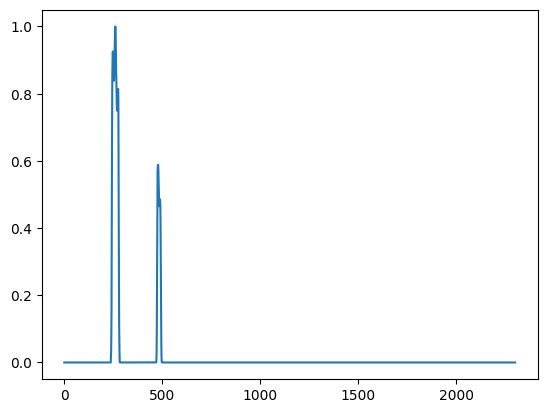

tensor(30.)
+++++++++++++++++


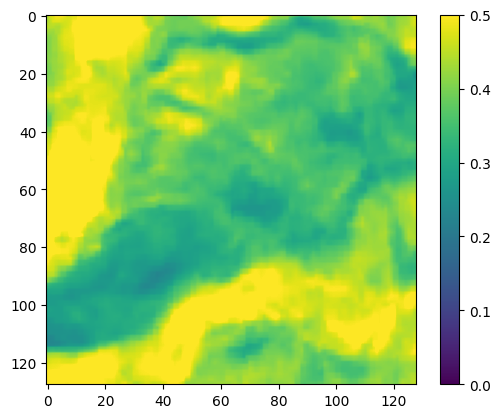

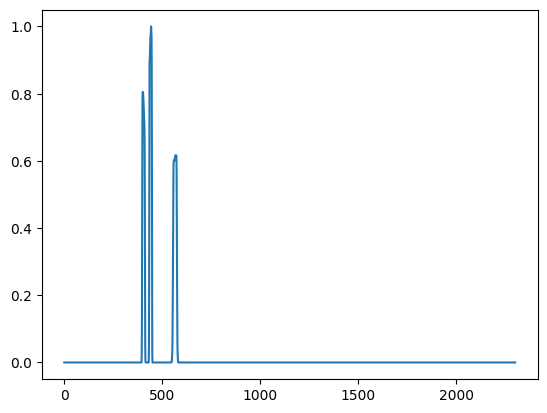

tensor(20.)
+++++++++++++++++


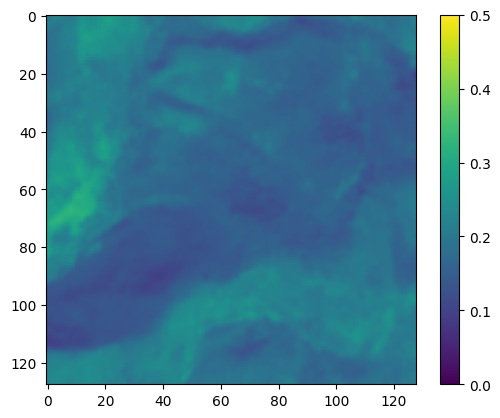

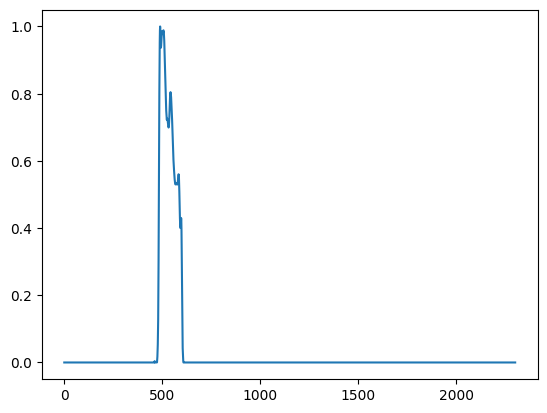

tensor(10.)
+++++++++++++++++


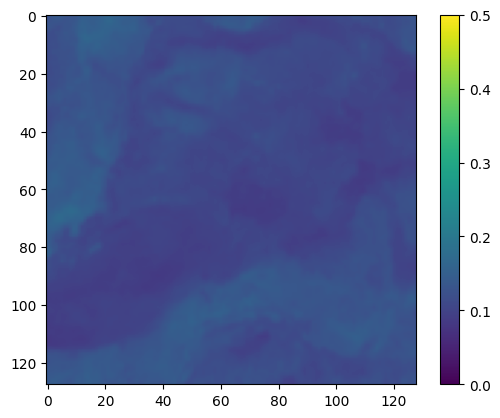

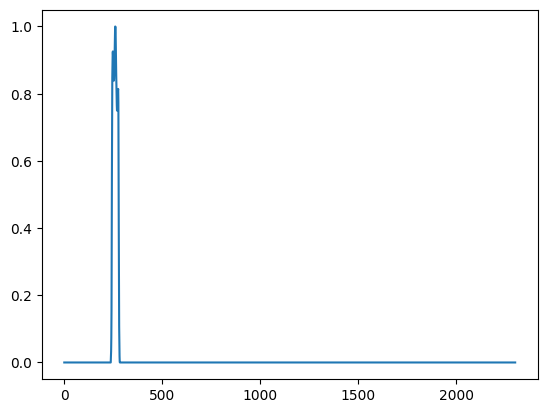

tensor(10.)
+++++++++++++++++


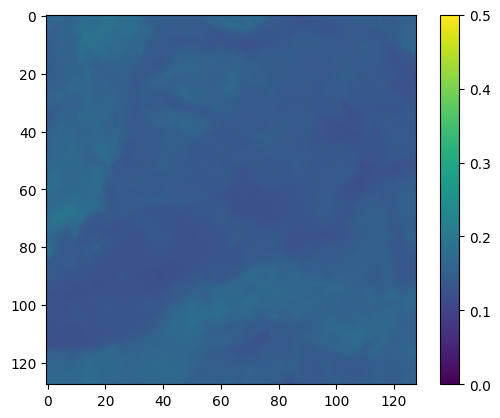

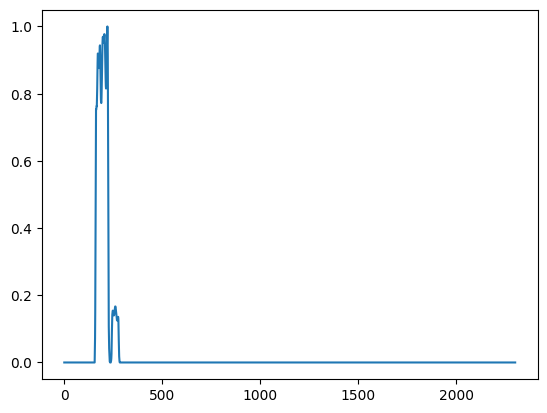

tensor(10.)


In [13]:
for i in range(N):

    batch = dl.__getitem__(i+100)
    
    for i in range(6):
    
        print("+++++++++++++++++")
        
        s2 = batch["s2"][i]
        rf = batch["rf"][i]
        gsd = batch["gsd"][i]
    
        plt.imshow(s2,vmin=0,vmax=0.5)
        plt.colorbar()
        plt.show()

        # plt.hist(s2.flatten())
        # plt.show()
        
        plt.plot(rf)
        plt.show()
    
        print(gsd)
    break
    

In [6]:
batch["s2"].shape

torch.Size([6, 128, 128])

In [7]:
s2rf_10m = np.load("rs_s2_10m.npy")
s2rf_20m = np.load("rs_s2_20m.npy")
s2rf_30m = np.load("rs_s2_30m.npy")

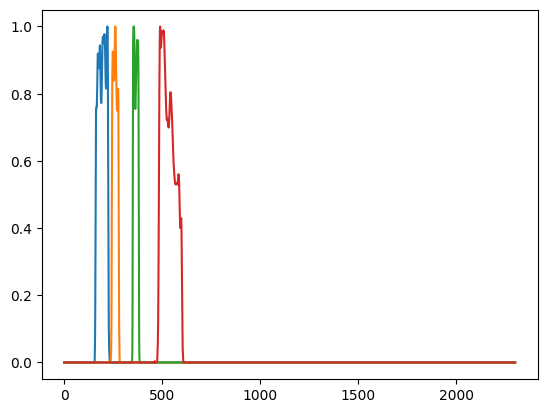

In [8]:
for i in range(4):
    plt.plot(s2rf_10m[i])

[0.44794657 0.04703668 0.14735853]


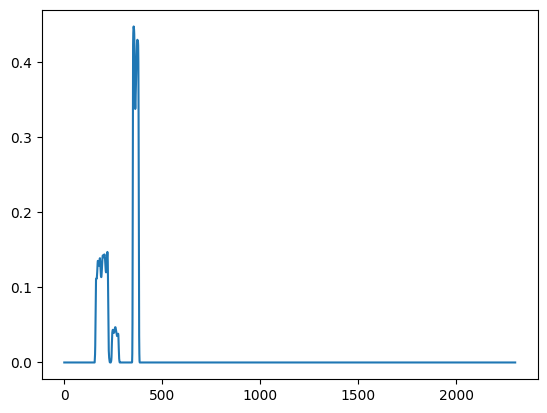

In [9]:

responsefunctiondict = {10:s2rf_10m,
                                     20:s2rf_20m,
                                     30:s2rf_30m}

gsd = 10
num_bands = 3

factors = np.random.rand(num_bands) 
inversemax = 1/factors.max()

print(factors)


bandindices = np.random.choice(4,num_bands, replace=False)


rf = responsefunctiondict[gsd][bandindices]
rf = rf*factors[:,None]
rf = rf.sum(axis=0)

plt.plot(rf)

In [10]:
np.sum(factors)

0.6423417792117194

In [11]:
np.random.uniform(0.2,0.9,100)

array([0.54937828, 0.86024046, 0.83243544, 0.34905057, 0.48042416,
       0.78454389, 0.76767093, 0.7987795 , 0.31978974, 0.55922856,
       0.29137808, 0.73783535, 0.67658324, 0.36084043, 0.72424986,
       0.62866439, 0.65068645, 0.59523119, 0.24245373, 0.74961687,
       0.28796594, 0.53414526, 0.23821584, 0.74840774, 0.41551899,
       0.30704358, 0.72356362, 0.73142987, 0.38901653, 0.50822106,
       0.89634402, 0.83387046, 0.74231407, 0.70429059, 0.62370912,
       0.34776733, 0.79037535, 0.6459627 , 0.38050259, 0.50212951,
       0.73751945, 0.48255308, 0.58002939, 0.74326604, 0.6633796 ,
       0.37754342, 0.51392034, 0.43140882, 0.34593458, 0.3542039 ,
       0.26508035, 0.48521326, 0.60406577, 0.89950145, 0.79428751,
       0.77810269, 0.70523676, 0.51054125, 0.56452577, 0.4450147 ,
       0.73591816, 0.69753032, 0.28446112, 0.57721277, 0.78784104,
       0.82359682, 0.46054245, 0.32784004, 0.64783549, 0.3922344 ,
       0.55514748, 0.5748061 , 0.83427557, 0.86481106, 0.78865